# Data Analysis Examples

## 13.1 Bitly Data from 1.USA.gov

In [87]:
# data đầu vào
path = "example.txt"

In [88]:
# đọc file và in dòng đầu tiên
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [89]:
# đọc file và lưu vào list records
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [90]:
# in ra bản ghi đầu tiên
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python

In [91]:
# Lấy danh sách các múi giờ từ records
# Một số record có thể không có khóa 'tz' → dễ gây lỗi KeyError
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [ ]:
# Hiển thị 10 múi giờ đầu tiên
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [ ]:
# đém số timezone 1
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
# đém số timezone 2
from collections import defaultdict

from sympy import sequence
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
# Đếm số muối giờ của America/New_York
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [ ]:
# dem toan bo gia tri cua timezone
len(time_zones)

3440

In [ ]:
# Hàm hiển thị 10 múi giờ phổ biến nhất
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
# Hiển thị 10 múi giờ phổ biến nhất
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
# có các khác để hiển thi 10 múi giờ phổ biến nhất là dùng thư viện collections
from collections import Counter

In [ ]:
# Đếm số muối giờ của timezone
counts = Counter(time_zones)

In [ ]:
# Hiển thị 10 múi giờ phổ biến nhất bằng thư viện collections
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas

In [ ]:
import pandas as pd
# chuyển records thành dataframe
frame = pd.DataFrame(records)

In [ ]:
# hiển thị thông tin dataframe
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [92]:
# hiển thị các dòng đầu tiên của cột tz
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [ ]:
# đếm số các giá trị trong cột tz
tz_counts = frame["tz"].value_counts()
# hiển thì giá trị đếm được của các dòng đầu tiên
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [ ]:
# Xử lý giá trị thiếu trong cột tz
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"

In [ ]:
# đếm lại các giá tri trong cột tz sau khi đã xử lý giá trị thiếu
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [ ]:
# Vẽ biểu đồ
import seaborn as sns

In [ ]:
# Lấy ra 5 giá trị hàng đầu
subset = tz_counts.head()

<Axes: ylabel='tz'>

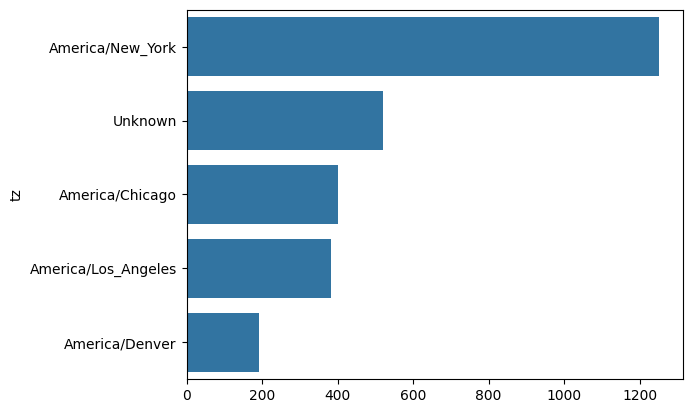

In [ ]:
# Vẽ biểu đồ thanh ngang
sns.barplot(y=subset.index, x=subset.to_numpy())

In [ ]:
# Hiển thị giá trị của cột a tại dòng 1
frame["a"][1]

'GoogleMaps/RochesterNY'

In [ ]:
# Hiển thị giá trị của cột a tại dòng 50
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [ ]:
# Hiển thị giá trị của cột a tại dòng 51 và 50 giá trị đầu tiên
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [ ]:
# Tách chuỗi và lấy ra tên trình duyệt
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [ ]:
# Hiển thị 5 giá trị đầu tiên
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [ ]:
# Hiển thị các trình duyệt phổ biến nhất
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [ ]:
# Lọc bỏ các giá trị thiếu trong cột a
cframe = frame[frame["a"].notna()].copy()

In [ ]:
# Thêm cột os vào cframe
import numpy as np
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [ ]:
# Hiển thị 5 giá trị đầu tiên của cột os
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [ ]:
# Đếm số lượng người dùng theo múi giờ và hệ điều hành
by_tz_os = cframe.groupby(["tz", "os"])

In [ ]:
# Tạo bảng tổng hợp
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [97]:
# Sắp xếp theo số lượng người dùng
indexer = agg_counts.sum("columns").argsort()

In [98]:
# Lấy 10 giá trị đầu tiên của chỉ số
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [114]:
# Lấy 10 giá trị cuối cùng của bảng tổng hợp
count_subset = agg_counts.take(indexer[-10:])

In [115]:
# Hiển thị 10 giá trị cuối cùng của bảng tổng hợp
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [116]:
# Sắp xếp lại bảng tổng hợp theo số lượng người dùng
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [ ]:
# Chuyển bảng tổng hợp về dạng dài và đặt tên cột
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

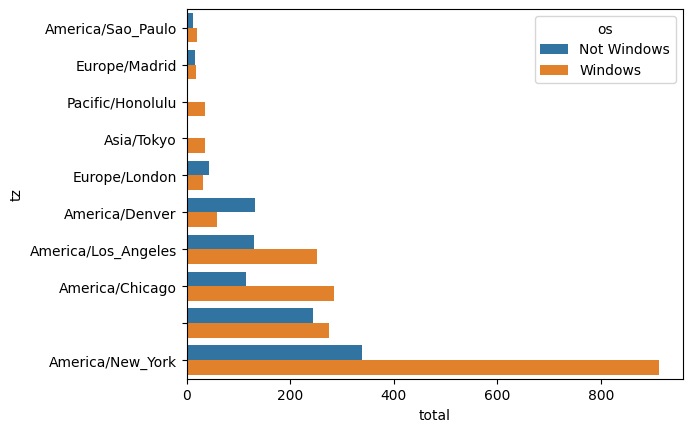

In [ ]:
# Vẽ biểu đồ thanh ngang
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [119]:
# Chuẩn hóa dữ liệu
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group
results = count_subset.groupby("tz").apply(norm_total)

C:\Users\dtoan\AppData\Local\Temp\ipykernel_17284\2565097564.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

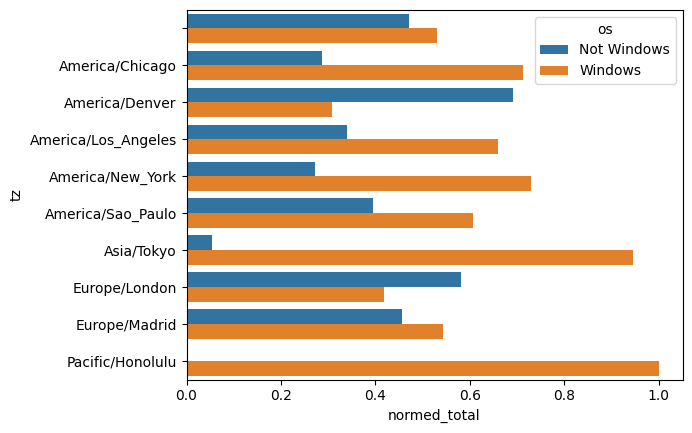

In [120]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

<Axes: xlabel='normed_total', ylabel='tz'>

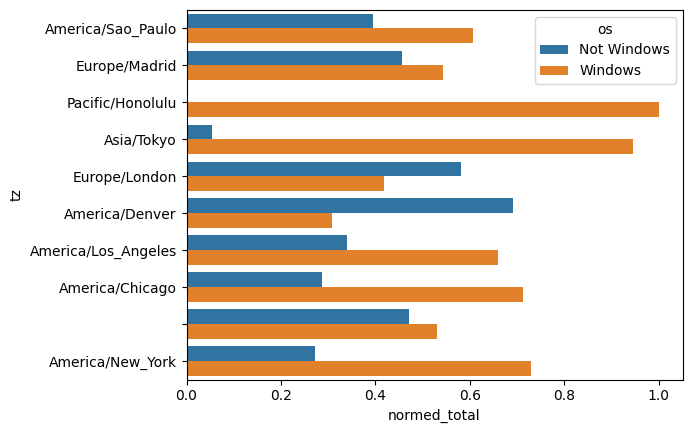

In [124]:
# Cách khác để chuẩn hóa dữ liệu
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")
# xuất kết quả
# Kết quả chuẩn hóa là một Series, cần thêm vào DataFrame để vẽ với seaborn
count_subset["normed_total"] = results2
sns.barplot(x="normed_total", y="tz", hue="os", data=count_subset)

## 13.2 MovieLens 1M Dataset

In [133]:

unames = ["user_id", "gender", "age", "occupation", "zip"]  # đọc dữ liệu người dùng
users = pd.read_table("users.dat", sep="::", header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]  # đọc dữ liệu đánh giá
ratings = pd.read_table("ratings.dat", sep="::", header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]  # đọc dữ liệu phim
movies = pd.read_table("movies.dat", sep="::", header=None, names=mnames, engine="python")

In [ ]:
# hiển thị 5 giá trị đầu tiên của bảng users
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [135]:
# hiển thị 5 giá trị đầu tiên của bảng ratings
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [136]:
# hiển thị 5 giá trị đầu tiên của bảng movies
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [140]:
# hiển thị toàn bộ bảng ratings
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
# Kết hợp các bảng với nhau
data = pd.merge(pd.merge(ratings, users), movies)

In [142]:
# hiển thị
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
# hiển thị thông tin của một người dùng
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [ ]:
# Tính điểm đánh giá trung bình cho mỗi phim theo giới tính
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")

In [147]:
# hiển thị 5 giá trị đầu tiên
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [149]:
# Đếm số lượng đánh giá cho mỗi phim
ratings_by_title = data.groupby("title").size()

In [151]:
# hiển thị 5 giá trị đầu tiên
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [ ]:
# Lấy các phim có ít nhất 250 đánh giá
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [154]:
# hiển thị
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [155]:
# lọc mean_ratings chỉ giữ lại các phim có ít nhất 250 đánh giá
mean_ratings = mean_ratings.loc[active_titles]

In [157]:
# hiển thị
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [159]:
# Sắp xếp theo điểm đánh giá trung bình của nữ
top_female_ratings = mean_ratings.sort_values("F", ascending=False)

In [162]:
# hiển thị 5 giá trị đầu tiên
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### Measuring Rating Disagreement

In [ ]:
# tính chênh lệch điểm đánh giá giữa nam và nữ
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")